<a href="https://colab.research.google.com/github/JorgeARuedaC/Book/blob/master/Ejercicio_3_Arboles_de_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
Diabetes = pd.read_csv("diabetes.csv", header=1, names=col_names)
Diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [17]:
Diabetes.describe()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = Diabetes[feature_cols] # Caracteristicas
y = Diabetes.label # Variable objetivo

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test
arbol3 = DecisionTreeClassifier()
arbol3 = arbol3.fit(X_train,y_train)
y_pred = arbol3.predict(X_test)

In [10]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7402597402597403


In [11]:
arbol3.score(X_test,y_test)

0.7402597402597403

In [12]:
export_graphviz(arbol3,out_file= 'arbol3.dot', class_names=['0','1'],
                feature_names=feature_cols,impurity=False,filled=True)

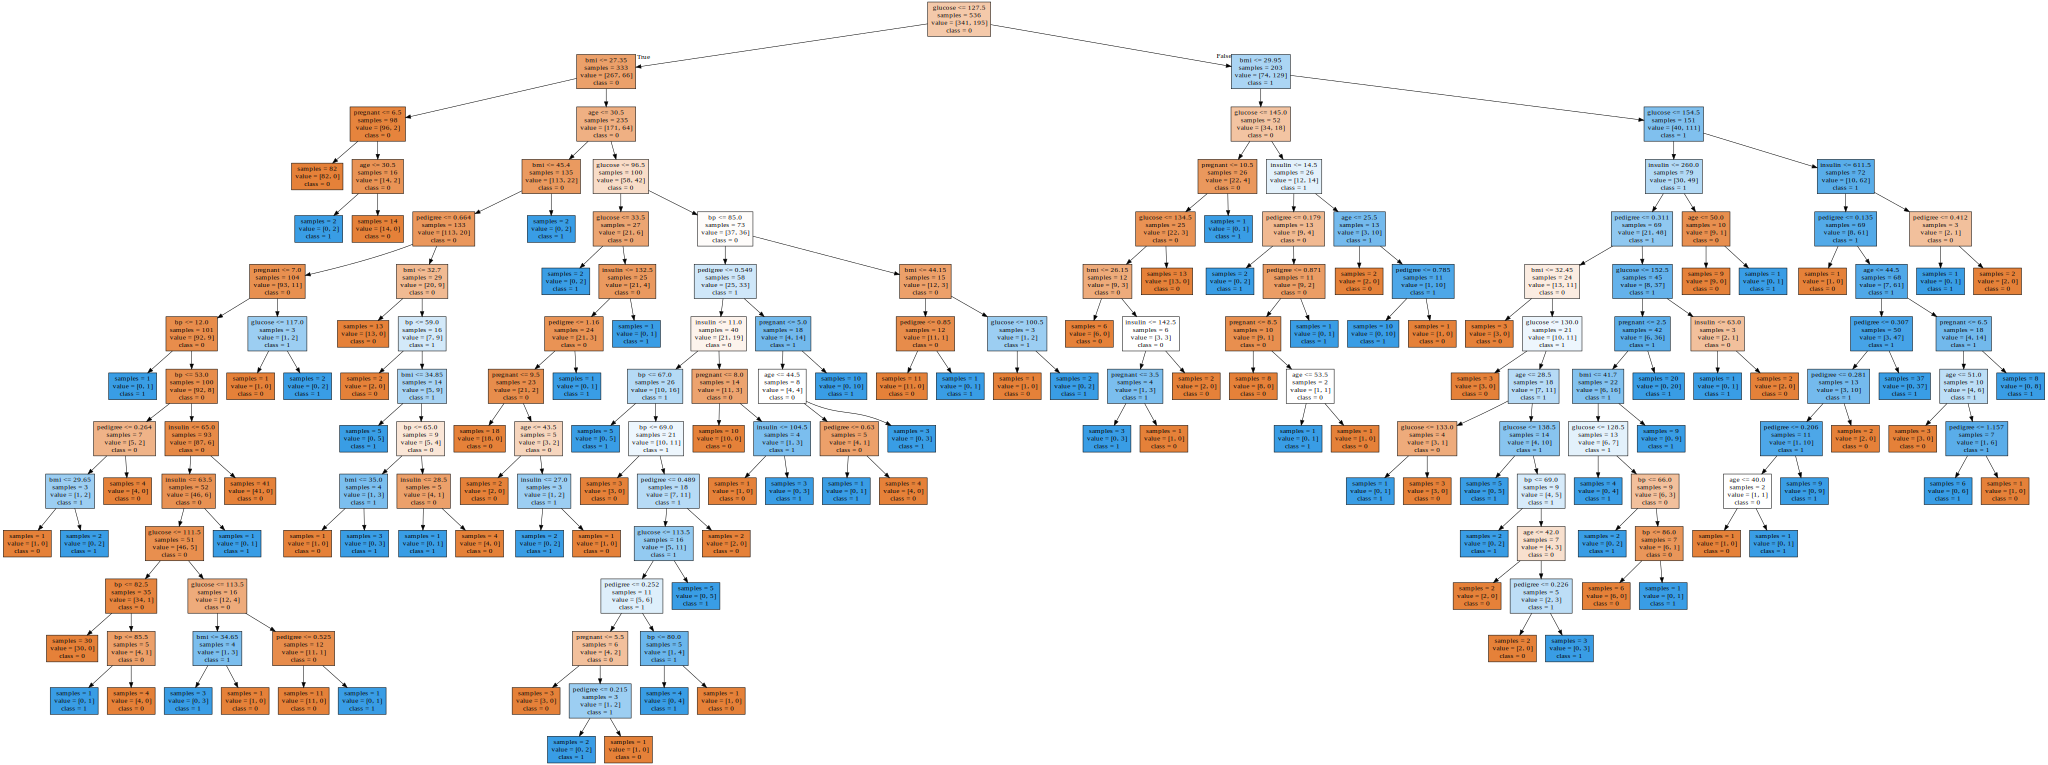

In [13]:
with open ('arbol3.dot') as f:
	dot_graph=f.read()
graphviz.Source (dot_graph)

In [14]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(DecisionTreeClassifier())
clf.fit(X, y)

feature_importances = np.mean([
    tree.feature_importances_ for tree in clf.estimators_
], axis=0)

In [15]:
print (feature_importances)

[0.07701641 0.06966057 0.16479079 0.13751472 0.32295254 0.0907218
 0.13734316]
